In [2]:
pip install pillow
pip install image

Note: you may need to restart the kernel to use updated packages.


In [30]:
from pymongo import MongoClient
from gridfs import GridFS
from PIL import Image

In [17]:
db = MongoClient().python_test
fs = GridFS(db)

In [18]:
db.fs.files.find()  # fs.files라는 테이블명에서 전체조회

In [19]:
list(db.fs.files.find())    # 안보일 때에는 리스트로 감싸주자!

[{'_id': ObjectId('608f5c48a4e9f8d89a0945d7'),
  'filename': 'test.txt',
  'md5': 'a9a00ea9b236e82a7b2e4e92000d4f62',
  'chunkSize': 261120,
  'length': 36,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 28, 552000)},
 {'_id': ObjectId('608f625ea4e9f8d89a0945d9'),
  'filename': 'test.txt',
  'md5': 'a9a00ea9b236e82a7b2e4e92000d4f62',
  'chunkSize': 261120,
  'length': 36,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 39, 26, 240000)},
 {'_id': ObjectId('608f80241d441629bbbcf358'),
  'filename': 'samsaek.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': '8176eaf840515b02a52ad744cc51eefb',
  'length': 90178,
  'uploadDate': datetime.datetime(2021, 5, 3, 4, 46, 33, 395000)}]

In [20]:
list(db.fs.files.find())[2]

{'_id': ObjectId('608f80241d441629bbbcf358'),
 'filename': 'samsaek.jpg',
 'metadata': {'contentType': 'image/jpg'},
 'chunkSize': 261120,
 'md5': '8176eaf840515b02a52ad744cc51eefb',
 'length': 90178,
 'uploadDate': datetime.datetime(2021, 5, 3, 4, 46, 33, 395000)}

In [21]:
filename = list(db.fs.files.find())[2]['filename']

In [27]:
f = fs.get_last_version(filename=filename)

In [28]:
data = f.read()     # 가장 마지막에 업로드한 파일 내용을 읽어와서 data라는 변수에 담아주기
data

e2\xb3\xebT)\xd2\xf6\x18\xd3q(\xc4\xb2\x15P\xf5\xbd\x94#R_G\xef%j\xbdZ\xadV\xec\x96\xf2\x17\x0f\xbc\x87Y\'\nZ/\'9\x97\x12\x8e\x90\xc6H\x99\xc9\x1a0\xc7\x1e\xd2\x96\xa5\x13\x92\x83L\\H\xd1\x87;+\xc5+\xc5\xcb\x89\x13Q\xf5\x92\xd3h\x07\xeb!\x92AK\x1aDCM\xd5@S:\x17u\xa2:BM\xf1n\xea\xa4\xc8\xc2\xc7\xd5VR-\x83\x12\xb7\x80E\nc{\x8be\x0e\xaeE\xd2\x08\xd14hN\xb9\x9e,J5).\xad\x8a\xacKC\x99\xa8D4\xebsDH\xde4P\xc1\xa8\x15<]naQ\xd3\x1a\xc6\xd4\xdd\xa4^,=e\xa9\xc9X\xf6\x94\x8dg\x1aa\xe1Nh\x93Z\xd1D\xce*\x87\xb1Z\xb4m\x08\xf0\xa6)\x8a\x91\xecX\x826e\x1e\xe5\x05\x03\xd9x)\x82&F\xcc\xa5:C\xb2\x98-\x0e(Z4\xe1\xcaX\xb2\xb7O\x18U\x1cj\xf0{\x16*;\xaa&CrXZ%\x1cTdX\xa3\x0c\x0e*\xb0Le-L\x05\x95\xbb\xa2eD\xe8\xc2\x80\xbcU\xde\xa1v\x90)\xc36\xe5N\xe8Y\xd3\x00S\xc4\x96\xed\xd6P\x050\x85\n0j!wW\x8a\x1cU\x16\xa8\xeeP\x19\x1e\x08\x98P\x14,\x8d\x85\x03+rN\x85\xbb*\xb5V*3\xa6\x14\xee\x85\xddY(,\xa4+\x14\x0e\xe9\x8e\xc8\\P\x02\xce\x8cI\x0b\x82 d\x82\xefWz\x02\xb5L\xa8\x0b\xef(\xa9GBtL\xaf\x14\n\xd3\x81n\xad\x99LU\xe2\

In [29]:
Image.open(data)        # open의 매개변수에는 ByteIO가 들어가야 한다! 안그러면 에러

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [31]:
from io import BytesIO

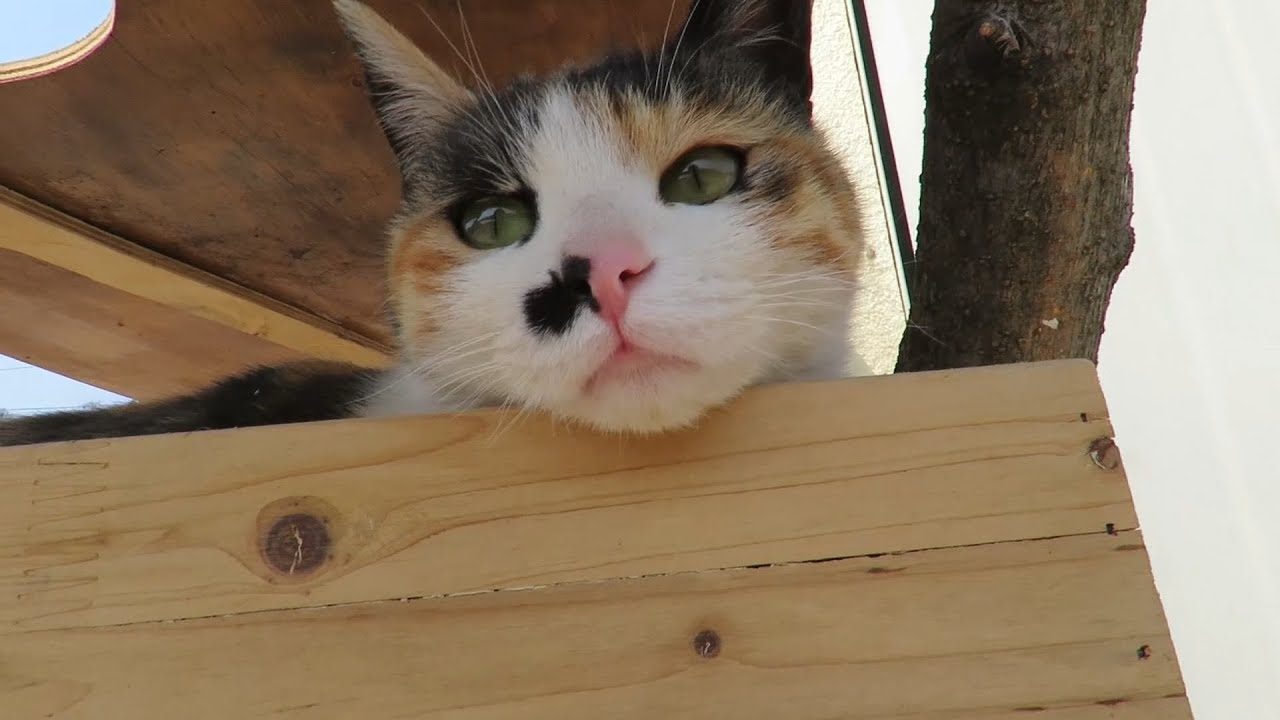

In [32]:
Image.open(BytesIO(data))
            # 1.data에 있는 이미지 내용을 읽어들임
# 2.BytesIO가 그림을 보여줌